In [7]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('ipl.csv')

In [11]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
data.shape

(76014, 15)

In [13]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [14]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [15]:
#Removing unwanted columns
col_remove = ['mid', 'striker', 'non-striker','batsman', 'bowler']
print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels = col_remove, axis = 1, inplace = True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 10)


In [16]:
data.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [17]:
data.index

RangeIndex(start=0, stop=76014, step=1)

In [18]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [19]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [20]:
#keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(data.shape))
data=data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

Before removing inconsistent teams: (76014, 10)
After removing inconsistent teams: (53811, 10)


In [21]:
#Removing the first 5 overs data in every match
data = data[data['overs']>=5.0]

In [22]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [23]:
data['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [24]:
#Converting the column 'date' from string into datatime object
from datetime import datetime
print("Before converting date column from string to datetime object: {}".format(type(data.iloc[0,0])))
#data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
print('After converting date column from string to datetime object: {}'.format(type(data.iloc[0,0])))

Before converting date column from string to datetime object: <class 'str'>
After converting date column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


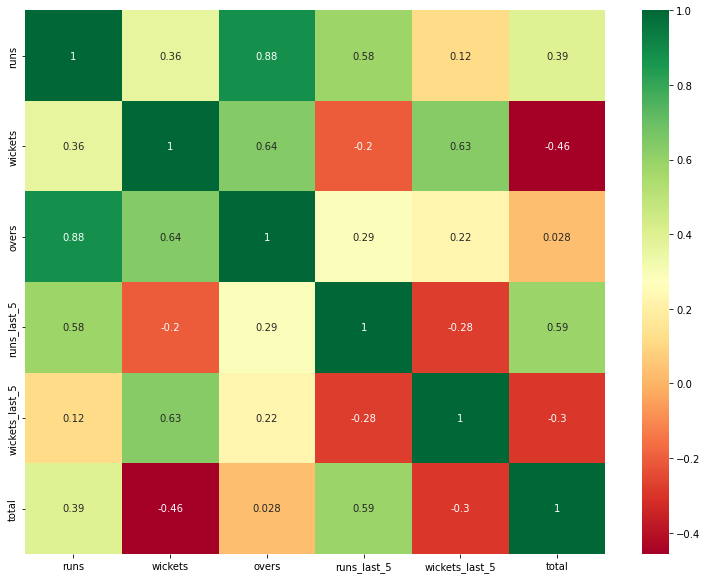

In [25]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Data Preprocessing

In [26]:
encode = pd.get_dummies(data=data, columns=['bat_team','bowl_team','venue'])
encode.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'ven

In [27]:
Grounds = ['venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead', 'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands', 'venue_SuperSport Park',  'venue_Sawai Mansingh Stadium', 'venue_Sheikh Zayed Stadium',
       'venue_OUTsurance Oval', 'venue_Shaheed Veer Narayan Singh International Stadium', "venue_St George's Park", 'venue_Subrata Roy Sahara Stadium', ]

In [28]:
#keeping only consistent venues
print('Before removing inconsistent venues: {}'.format(data.shape))
data=data[(data['bat_team'].isin(Grounds)) & (data['bowl_team'].isin(Grounds))]
print('After removing inconsistent venues: {}'.format(data.shape))

Before removing inconsistent venues: (40108, 10)
After removing inconsistent venues: (0, 10)


In [29]:
encode.head(20)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2008-04-18,61,1,5.6,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
encode = encode[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad', 'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens','venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
              'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sharjah Cricket Stadium', 
                 'venue_Wankhede Stadium',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [31]:
#splitting the data into train and test set
X_train = encode.drop(labels = 'total', axis=1)[encode['date'].dt.year<=2016]
X_test = encode.drop(labels='total', axis=1)[encode['date'].dt.year >= 2017]

y_train = encode[encode['date'].dt.year <= 2016]['total'].values
y_test = encode[encode['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 31) and Test set: (2778, 31)


# Linear Regression 

In [32]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_lr = linear_regressor.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.527498036845115
Mean Squared Error (MSE): 275.5872949982186
Root Mean Squared Error (RMSE): 16.600822118142784


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_lgr = logistic_regressor.predict(X_test)

In [60]:
print("---- Logistic Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lgr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lgr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lgr))))

---- Logistic Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.055075593952484
Mean Squared Error (MSE): 427.41360691144706
Root Mean Squared Error (RMSE): 20.673983818109345


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred_dt = decision_regressor.predict(X_test)

In [40]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error(RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.982001439884808
Mean Squared Error (MSE): 572.3462922966163
Root Mean Squared Error(RMSE): 23.923759994963508


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_rf = random_regressor.predict(X_test)

In [43]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.00287616990641
Mean Squared Error (MSE): 347.5636646463283
Root Mean Squared Error (RMSE): 18.643059422914693


# Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [45]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1e-1, 1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36758e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39866e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35638e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52492e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55412e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [46]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-332.9627681052223


In [47]:
prediction = ridge_regressor.predict(X_test)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

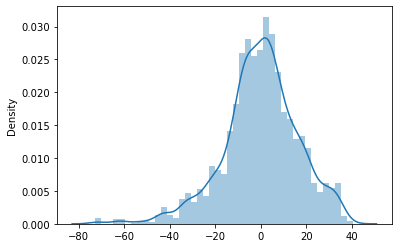

In [48]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [49]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  12.510988897055032
MSE:  274.5483208858533
RMSE:  16.569499717428204


In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4406452.3268565275, tolerance: 2529.9556965945626
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4283700.908935445, tolerance: 2547.0380710286613
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4546420.559233303, tolerance: 2667.812690436646
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to 

{'alpha': 1}
-320.82637477676485


# AdaBoost Algorithm

In [52]:
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator = linear_regressor, n_estimators = 100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [53]:
#predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [54]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.283181797048854
Mean Squared Error (MSE): 248.60826417495846
Root Mean Squared Error (RMSE): 15.767316327611319


# Predictions

In [63]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', venue = 'Wankhede Stadium', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]
    
  #venue
  if venue == 'Dubai International Cricket Stadium':
    temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
  elif venue == 'Eden Gardens':
    temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
  elif venue == 'M Chinnaswamy Stadium':
    temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
  elif venue == 'MA Chidambaram Stadium, Chepauk':
    temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
  elif venue == 'Rajiv Gandhi International Stadium, Uppal':
    temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
  elif venue == 'Sardar Patel Stadium, Motera':
    temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
  elif venue == 'Sharjah Cricket Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
  elif venue == 'Wankhede Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(adb_regressor.predict(temp_array)[0])



# Prediction 1

In [64]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', venue='Eden Gardens', overs=17.2, runs=111, wickets=4, runs_in_prev_5=26, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 131 to 146


In [65]:
final_score = predict_score(batting_team='Royal Challengers Bangalore', bowling_team='Kolkata Knight Riders', venue='M Chinnaswamy Stadium', overs=15, runs=142, wickets=1, runs_in_prev_5=64, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 189 to 204
The final predicted score (range): 167 to 182


In [66]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Chennai Super Kings', venue='Rajiv Gandhi International Stadium, Uppal', overs=10, runs=70, wickets=2, runs_in_prev_5=25, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 143 to 158
